In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
sns.set_theme(color_codes=True)
from sklearn.tree import DecisionTreeClassifier

In [71]:
test=pd.read_csv('/content/fraudTest.csv')
train=pd.read_csv('/content/fraudTrain.csv')

In [72]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


In [73]:
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991907 entries, 0 to 991906
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             991907 non-null  int64  
 1   trans_date_trans_time  991907 non-null  object 
 2   cc_num                 991907 non-null  int64  
 3   merchant               991907 non-null  object 
 4   category               991907 non-null  object 
 5   amt                    991907 non-null  float64
 6   first                  991907 non-null  object 
 7   last                   991907 non-null  object 
 8   gender                 991907 non-null  object 
 9   street                 991907 non-null  object 
 10  city                   991907 non-null  object 
 11  state                  991907 non-null  object 
 12  zip                    991907 non-null  int64  
 13  lat                    991907 non-null  float64
 14  long                   991907 non-nu

In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [76]:
train.isnull().sum()


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [77]:
fraud_counts_train = train['is_fraud'].value_counts()
fraud_counts_test = test['is_fraud'].value_counts()


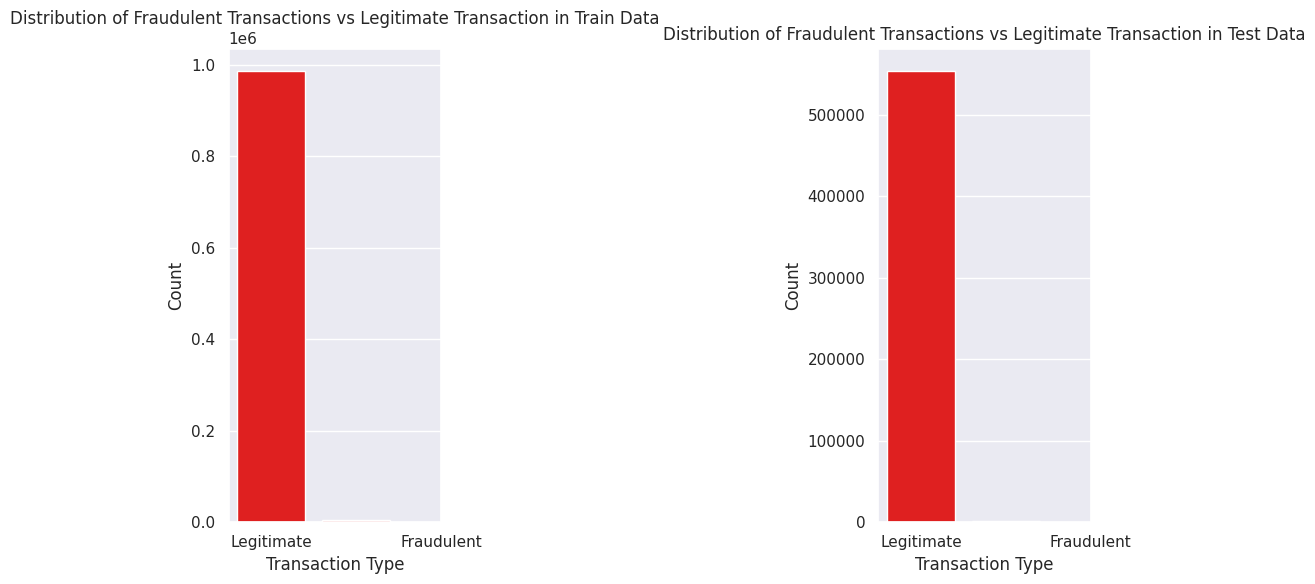

In [87]:
plt.figure(figsize=(10, 6))
plt.subplot(1,3,1)
sns.barplot(x=fraud_counts_train.index, y=fraud_counts_train.values, color='red')
plt.title('Distribution of Fraudulent Transactions vs Legitimate Transaction in Train Data')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks([0, 2], ['Legitimate', 'Fraudulent'])

plt.subplot(1,3,3)
sns.barplot(x=fraud_counts_test.index, y=fraud_counts_test.values, color='red')
plt.title('Distribution of Fraudulent Transactions vs Legitimate Transaction in Test Data')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks([0, 2], ['Legitimate', 'Fraudulent'])

plt.tight_layout()
plt.show()

In [ ]:
def data_preprocessing(X):
  del_col=['merchant','first','last','street','zip','trans_num','unix_time','Unnamed: 0','cc_num']
  X.drop(del_col,axis=1,inplace=True)

  X['trans_date_trans_time'] = pd.to_datetime(X['trans_date_trans_time'])
  X['trans_date'] = X['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
  X['trans_date']=pd.to_datetime(X['trans_date'])
  X['dob']=pd.to_datetime(X['dob'])

  X['age'] = (X['trans_date'] - X['dob']).dt.days //365
  X['trans_month'] = X['trans_date_trans_time'].dt.month
  X['trans_year']= X['trans_date'].dt.year

  X['gender'] = X['gender'].apply(lambda x : 1 if x=='M' else 0)
  X['gender'] = X['gender'].astype(int)

  X["lat_dis"]=abs(X['lat']-X['merch_lat'])
  X["long_dis"]=abs(X['long']-X['merch_long'])

  X=pd.get_dummies(X,columns=['category'])
  X=X.drop(columns=['trans_date_trans_time','trans_date','dob','state','job','merch_lat','merch_long','lat','long','city'])
  return X


In [ ]:
train_df_pre=data_preprocessing(train.copy())
test_df_pre=data_preprocessing(test.copy())


In [ ]:
train_df_pre.head()


,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,lat_dis,long_dis,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495.0,0.0,30.0,1,2019,0.067507,0.870215,False,...,False,False,False,False,True,False,False,False,False,False
1,107.23,0,149.0,0.0,40.0,1,2019,0.271247,0.024038,False,...,True,False,False,False,False,False,False,False,False,False
2,220.11,1,4154.0,0.0,56.0,1,2019,0.969904,0.107519,True,...,False,False,False,False,False,False,False,False,False,False
3,45.00,1,1939.0,0.0,52.0,1,2019,0.803731,0.447271,False,...,False,False,False,False,False,False,False,False,False,False
4,41.96,1,99.0,0.0,32.0,1,2019,0.254299,0.830441,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
test_df_pre.head()


,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,lat_dis,long_dis,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0,52,6,2020,0.020491,0.265214,False,...,False,False,False,False,False,False,True,False,False,False
1,29.84,0,302,0,30,6,2020,0.870202,0.475569,False,...,False,False,False,False,False,False,True,False,False,False
2,41.28,0,34496,0,49,6,2020,0.177090,0.659611,False,...,False,True,False,False,False,False,False,False,False,False
3,60.05,1,54767,0,32,6,2020,0.242698,0.063961,False,...,False,False,False,False,False,True,False,False,False,False
4,3.19,1,1126,0,65,6,2020,0.706248,0.867734,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
x_train=train_df_pre.drop('is_fraud',axis=1)
y_train=train_df_pre['is_fraud']
x_test=test_df_pre.drop('is_fraud',axis=1)
y_test=test_df_pre['is_fraud']

In [ ]:
x_train_no_nan = x_train.dropna()
y_train_no_nan = y_train[x_train_no_nan.index]


In [ ]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train_no_nan,y_train_no_nan)
y_pred_log=logistic_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred_log)

print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [ ]:
Decisiontree=DecisionTreeClassifier()
Decisiontree.fit(x_train_no_nan,y_train_no_nan)
y_pred_DT=Decisiontree.predict(x_test)
accuracy_DT=accuracy_score(y_test,y_pred_DT)
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.56      0.63      0.59      2145

    accuracy                           1.00    555719
   macro avg       0.78      0.81      0.79    555719
weighted avg       1.00      1.00      1.00    555719

